In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col = 0)
df

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
2021-01-16,Teton,Wyoming,56039.0,2614,4.0
2021-01-16,Uinta,Wyoming,56041.0,1813,9.0


In [56]:
df.head()
df.tail()
df.describe()

,fips,cases,deaths
count,921562.000000,930253.000000,910400.000000
mean,31270.844813,2184.935301,56.622094
std,16300.184464,11426.796033,459.918372
min,1001.000000,0.000000,0.000000
25%,19001.000000,40.000000,0.000000
50%,29217.000000,260.000000,4.000000
75%,46101.000000,1123.000000,24.000000
max,78030.000000,975693.000000,25834.000000


In [71]:
df1 = df.groupby(['county'])['cases'].max()
df1

county
Abbeville                     1472
Acadia                        5542
Accomack                      2125
Ada                          42377
Adair                         2500
                             ...  
Yukon-Koyukuk Census Area      250
Yuma                         32736
Zapata                        1320
Zavala                        1233
Ziebach                        330
Name: cases, Length: 1930, dtype: int64

In [62]:
sum(df1)  # Total cases

19859677

In [72]:
df2 = df.groupby(['state'])['deaths'].max()
df2

state
Alabama                       921.0
Alaska                        127.0
Arizona                      6437.0
Arkansas                      450.0
California                  13741.0
Colorado                      720.0
Connecticut                  1992.0
Delaware                      509.0
District of Columbia          847.0
Florida                      4561.0
Georgia                       867.0
Guam                          127.0
Hawaii                        251.0
Idaho                         387.0
Illinois                     8980.0
Indiana                      1359.0
Iowa                          447.0
Kansas                        720.0
Kentucky                      745.0
Louisiana                     715.0
Maine                         124.0
Maryland                     1221.0
Massachusetts                2939.0
Michigan                     3856.0
Minnesota                    1470.0
Mississippi                   318.0
Missouri                     1563.0
Montana               

In [73]:
sum(df2) # Total deaths

108213.0

In [74]:
sum(df2) / sum(df1) *100  # Total deaths rate

0.5448880160538361

In [25]:
drop_cols = ['fips']
df.drop(drop_cols, inplace = True, axis = 1)
df

,county,state,cases,deaths
date,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-01-16,Sweetwater,Wyoming,3280,26.0
2021-01-16,Teton,Wyoming,2614,4.0
2021-01-16,Uinta,Wyoming,1813,9.0


In [51]:
df3 = df[(df['state'] == 'New York') & (df['county'] == 'New York City')]
df3.tail(30)  # Situation in NYC in last 30 days

,county,state,cases,deaths
date,,,,
2020-12-18,New York City,New York,377728,24652.0
2020-12-19,New York City,New York,381067,24677.0
2020-12-20,New York City,New York,383808,24697.0
2020-12-21,New York City,New York,387595,24735.0
2020-12-22,New York City,New York,391634,24768.0
2020-12-23,New York City,New York,395810,24790.0
2020-12-24,New York City,New York,401251,24842.0
2020-12-25,New York City,New York,405857,24889.0
2020-12-26,New York City,New York,410048,24931.0


<AxesSubplot:xlabel='cases', ylabel='deaths'>

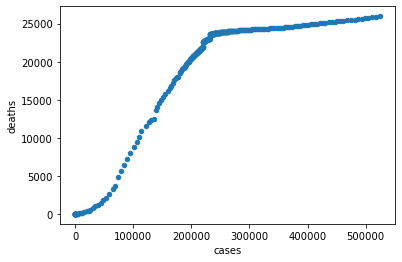

In [52]:
df3.plot(kind = 'scatter', x = 'cases', y = 'deaths')  # Show the positive relation between cases and deaths

<AxesSubplot:ylabel='Frequency'>

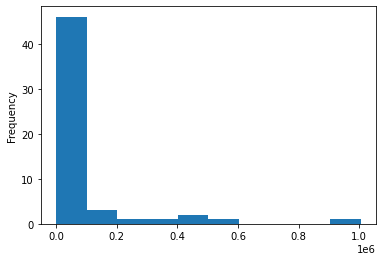

In [118]:
df4 = df.groupby(['state'])['cases'].max()
df4.plot(kind = "hist")

<AxesSubplot:xlabel='state'>

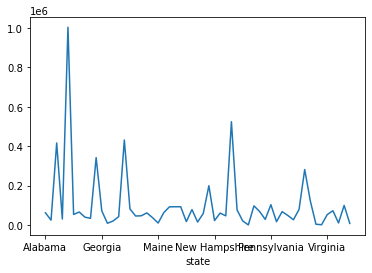

In [122]:
df4.plot()

In [ ]:
# As concliusion, California has the most cases and New York is the second state that has more cases. 